In [38]:
import pandas as pd

df = pd.read_csv('/Users/bobco/Downloads/neu_rmp_updated.csv')
columns_to_check = ['Average Rating (Out of 5)', 'Would Take Again (Percent)', 'Level of Difficulty (Out of 5)']  
df = df.dropna(subset=columns_to_check)
df.head(40)
df.to_csv('clean_data.csv', index=False)

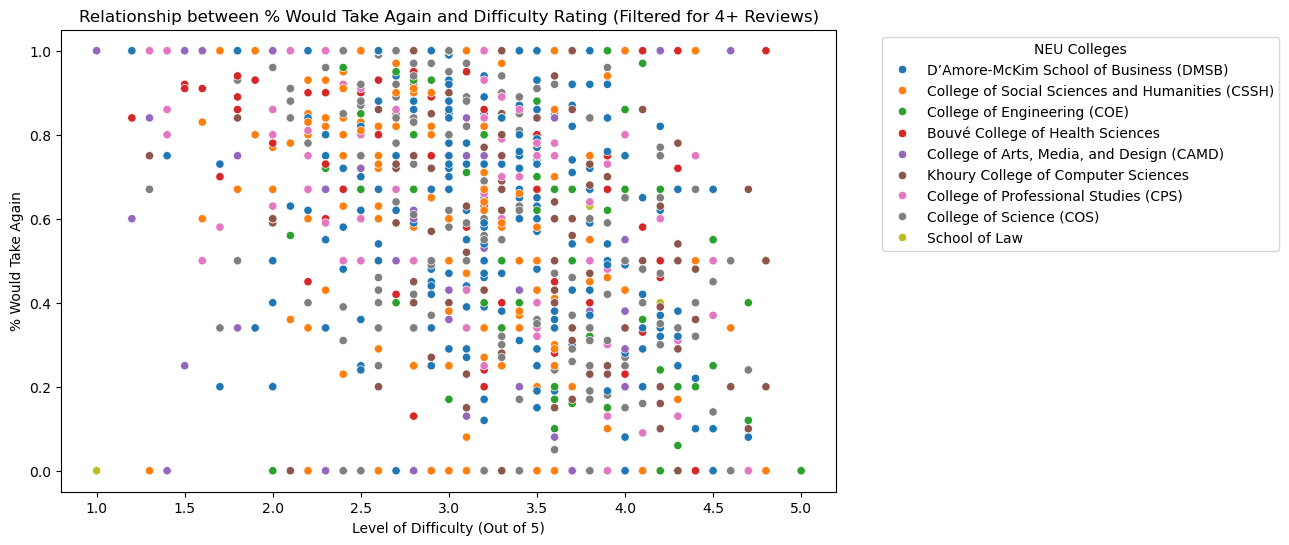

In [47]:

import matplotlib.pyplot as plt
import seaborn as sns
filtered_df = df[df['Number of Ratings'] >= 4]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Level of Difficulty (Out of 5)', 
                y='Would Take Again (Percent)', 
                hue='NEU_Colleges', 
                data=filtered_df, 
                palette='tab10')

plt.title('Relationship between % Would Take Again and Difficulty Rating')
plt.xlabel('Level of Difficulty (Out of 5)')
plt.ylabel('% Would Take Again')
plt.legend(title='NEU Colleges', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

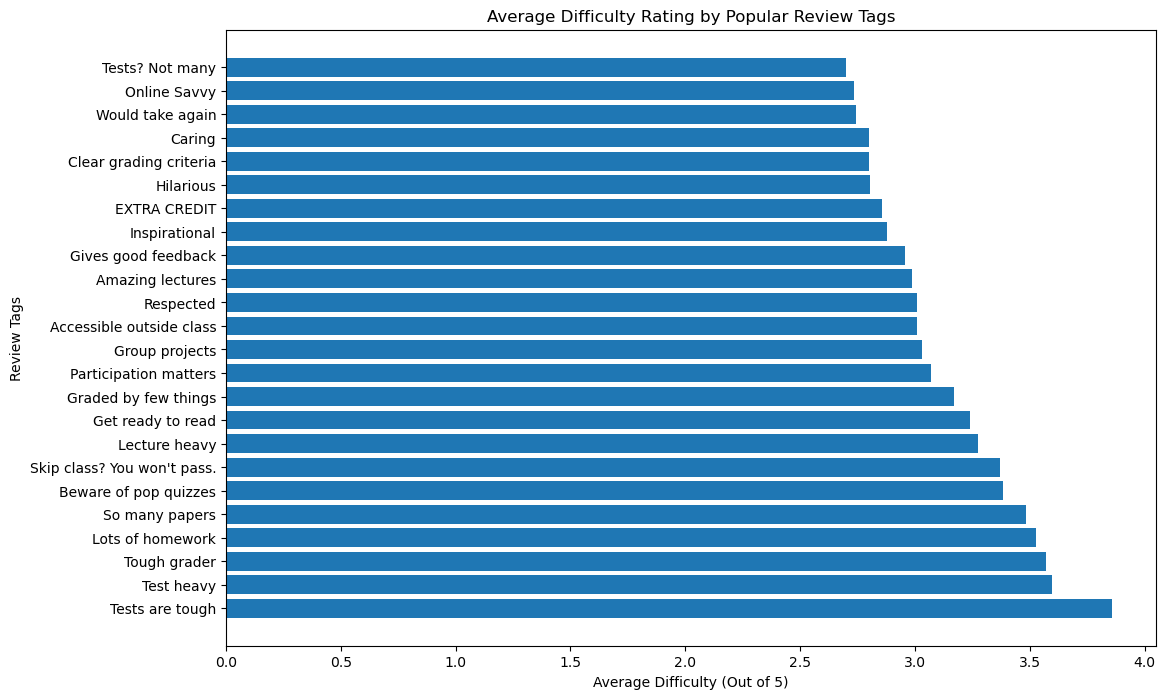

In [49]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

def extract_tags(tag_string):
    try:
        return eval(tag_string)
    except:
        return []


df['Tags'] = df['Popular Tags'].apply(extract_tags)
all_tags = [tag for sublist in df['Tags'] for tag in sublist]
tag_count = Counter(all_tags)
tag_df = pd.DataFrame(tag_count.items(), columns=['Tag', 'Count'])
df_explode = df.explode('Tags')
tag_difficulty = df_explode.groupby('Tags')['Level of Difficulty (Out of 5)'].mean().reset_index()


tag_analyze = pd.merge(tag_df, tag_difficulty, left_on='Tag', right_on='Tags').drop('Tags', axis=1)


plt.figure(figsize=(12, 8))
tag_analysis = tag_analyze.sort_values(by='Level of Difficulty (Out of 5)', ascending=False)
plt.barh(tag_analysis['Tag'], tag_analysis['Level of Difficulty (Out of 5)'])
plt.title('Average Difficulty Rating by Popular Review Tags')
plt.xlabel('Average Difficulty (Out of 5)')
plt.ylabel('Review Tags')
plt.show()